<a href="https://colab.research.google.com/github/yeswhos/Code-Practice/blob/master/python/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [24]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
x, y = Variable(x), Variable(y)

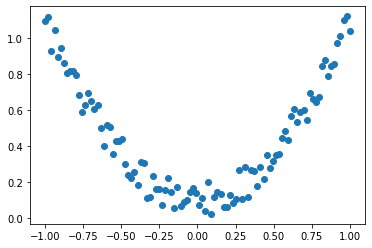

In [25]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [26]:
class Net(torch.nn.Module):
  def __init__(self, n_features, n_hidden, n_output):
    super(Net, self).__init__()
    #输入和输出在括号里
    self.hidden = torch.nn.Linear(n_features, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x

In [27]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [28]:
#可视化
#实时打印
plt.ion()
plt.show()

In [29]:
#SGD随机梯度下降
#lr梯度下降的速率
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
#均方差，用于回归
#用 真实值-预测值 然后平方之后求和平均。
loss_func = torch.nn.MSELoss()

In [33]:
for t in range(100):
  #预测值
  prediction = net(x)
  #预测值和真实的误差
  loss = loss_func(prediction, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(loss.data[0])
  if t % 5 == 0:
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 5)
    plt.text(0.5, 0, 'Loss = %.4f' % loss.data[0], fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)
plt.ioff()
plt.show()

IndexError: ignored